## Update QC metrics for blur to better catch poor quality images

Using the data from the `cellpainting_predicts_cardiac_fibrosis` repository, the QC thresholds will be updated to better detect poor quality images.

In the previous experiment, the thresholds were working well in those conditions.
To apply to this experiment, we will rerun the QC to find optimal thresholds for blur for all channels for only one side of the distribution.
More negative represents blur, so we only need one threshold to catch these conditions.
More positive/close to 0 looks to represent empty images but we don't need to catch that condition.

The goal is to minimize over-correction. We plot each metric per channel and manually define the best cut-off.

In [1]:
import pandas as pd
import pathlib
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# URL of the CSV file on GitHub
github_url = "https://raw.githubusercontent.com/WayScience/cellpainting_predicts_cardiac_fibrosis/main/1.preprocessing_data/qc_results/localhost231120090001/Image.csv"

# Load the CSV file into a pandas DataFrame
qc_df = pd.read_csv(github_url)

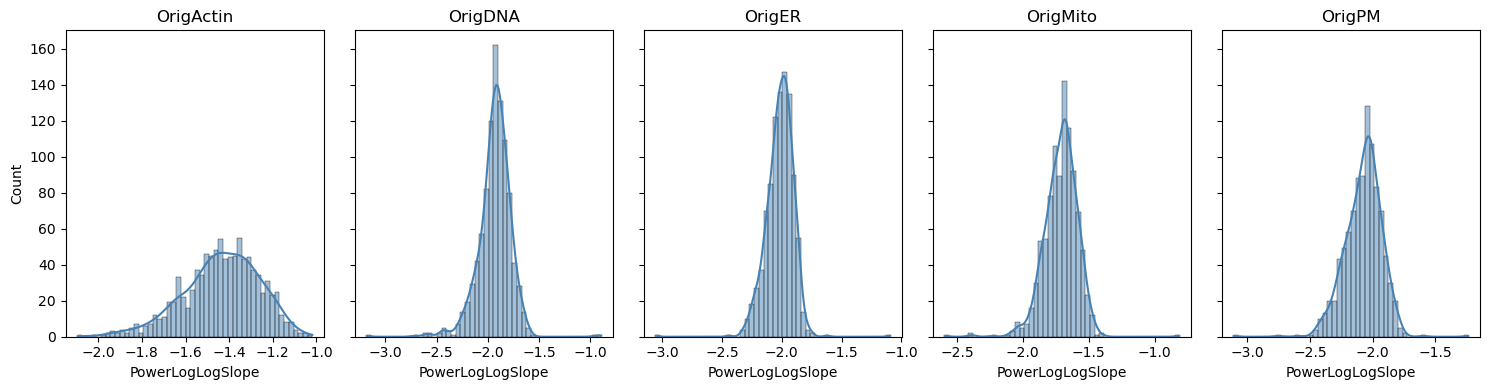

In [3]:
# Plot the distribution of PowerLogLogSlope for each channel to visualize where to cut off blurry images
channels = ["OrigActin", "OrigDNA", "OrigER", "OrigMito", "OrigPM"]

fig, axes = plt.subplots(1, len(channels), figsize=(15, 4), sharey=True)

for ax, channel in zip(axes, channels):
    col = f"ImageQuality_PowerLogLogSlope_{channel}"
    sns.histplot(qc_df[col], bins=50, kde=True, ax=ax, color="steelblue")
    ax.set_title(channel)
    ax.set_xlabel("PowerLogLogSlope")

plt.tight_layout()
plt.show()

Based on the distributions, we can manually determine optimal cutoffs where we can see the tail of the normal distribution occur.
  
We visualize these thresholds below on the plot to validate.

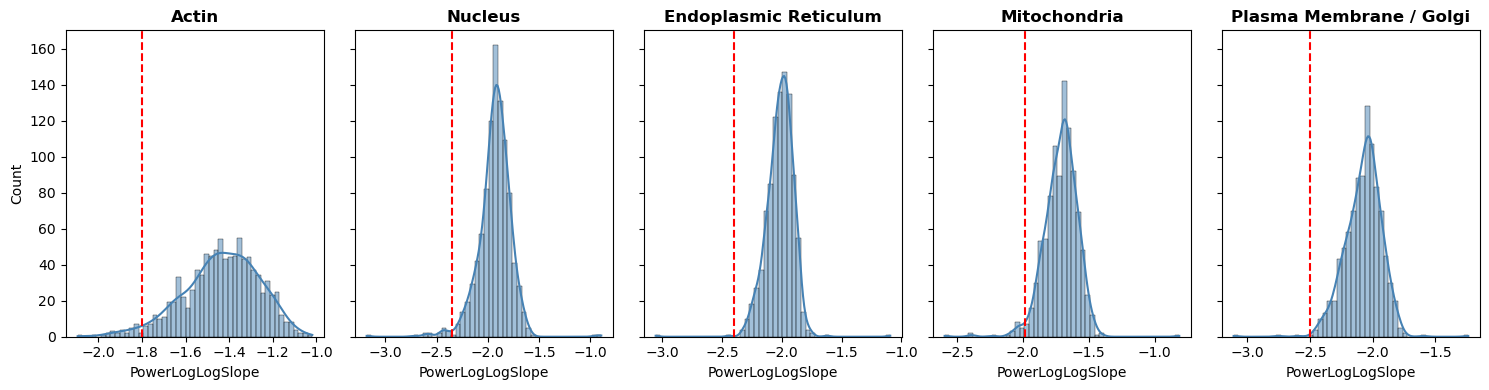

In [4]:
# Plot the distribution of PowerLogLogSlope for each channel to visualize where to cut off blurry images
blur_thresholds = {
    "OrigActin": -1.8,
    "OrigDNA": -2.35,
    "OrigER": -2.4,
    "OrigMito": -1.98,
    "OrigPM": -2.5,
}

# Mapping for nicer facet titles
facet_titles = {
    "OrigActin": "Actin",
    "OrigDNA": "Nucleus",
    "OrigER": "Endoplasmic Reticulum",
    "OrigMito": "Mitochondria",
    "OrigPM": "Plasma Membrane / Golgi",
}

fig, axes = plt.subplots(1, len(channels), figsize=(15, 4), sharey=True)

for ax, channel in zip(axes, channels):
    col = f"ImageQuality_PowerLogLogSlope_{channel}"
    sns.histplot(qc_df[col], bins=50, kde=True, ax=ax, color="steelblue")
    ax.axvline(blur_thresholds[channel], color="red", linestyle="--", linewidth=1.5)
    # Include threshold in the title
    ax.set_title(f"{facet_titles[channel]}", fontweight="bold")
    ax.set_xlabel("PowerLogLogSlope")

plt.tight_layout()
plt.savefig("blur_thresholds_example.png", dpi=500)
plt.show()

In [5]:
# Save thresholds as JSON
output_path = pathlib.Path("blur_qc_thresholds.json")
with output_path.open("w") as f:
    json.dump(blur_thresholds, f, indent=4)

print(f"Saved thresholds to {output_path.resolve()}")

Saved thresholds to /home/jenna/targeted_fibrosis_drug_screen/1.illumination_correction/qc_update/blur_qc_thresholds.json
